In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import tree
import seaborn as sns


In [15]:
#reading csv file
df = pd.read_csv('dataset_sdn.csv')
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [16]:
#describing structure of dataset
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
df.info()
df.describe()

This Dataset has 104345 rows and 23 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [17]:
#data preprocessing 
#seeing null values , counting them and then removing them from dataset
df.isnull().sum()
(df.isnull().sum()/df.isnull().count())*100
df.dropna(inplace=True)
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
This Dataframe has 103839 rows and 23 columns after removing null values


In [18]:
#malign means under attack and benign is opposite of malign 
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]
labels = ['benign','malign']
print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.01 %
Number of DDOS attacks that has not occured : 60.99 %


In [30]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 103839 rows and 57 columns after encoding


In [31]:
#dataframe after encoding
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,False,False,False,False,False,False,True,False,False,True
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True


In [32]:
df.dtypes

dt                 int64
switch             int64
pktcount           int64
bytecount          int64
dur                int64
dur_nsec           int64
tot_dur          float64
flows              int64
packetins          int64
pktperflow         int64
byteperflow        int64
pktrate            int64
Pairflow           int64
port_no            int64
tx_bytes           int64
rx_bytes           int64
tx_kbps            int64
rx_kbps          float64
tot_kbps         float64
label              int64
src_10.0.0.10       bool
src_10.0.0.11       bool
src_10.0.0.12       bool
src_10.0.0.13       bool
src_10.0.0.14       bool
src_10.0.0.15       bool
src_10.0.0.16       bool
src_10.0.0.17       bool
src_10.0.0.18       bool
src_10.0.0.2        bool
src_10.0.0.20       bool
src_10.0.0.3        bool
src_10.0.0.4        bool
src_10.0.0.5        bool
src_10.0.0.6        bool
src_10.0.0.7        bool
src_10.0.0.8        bool
src_10.0.0.9        bool
dst_10.0.0.10       bool
dst_10.0.0.11       bool


In [33]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

In [34]:
#normalizing 
ms = MinMaxScaler()
x = ms.fit_transform(x)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)


(72687, 56) (31152, 56)


In [67]:
#defining deep neural network(DNN)
Classifier_accuracy = []

# Define and compile model
model = keras.Sequential()
model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [68]:
      # Output: 4
print(len(Classifier_accuracy))     

0


In [37]:
# fit model
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

Epoch 1/100
2272/2272 - 4s - loss: 0.1700 - accuracy: 0.9275 - val_loss: 0.1109 - val_accuracy: 0.9535 - 4s/epoch - 2ms/step
Epoch 2/100
2272/2272 - 3s - loss: 0.0977 - accuracy: 0.9602 - val_loss: 0.1031 - val_accuracy: 0.9588 - 3s/epoch - 2ms/step
Epoch 3/100
2272/2272 - 3s - loss: 0.0808 - accuracy: 0.9668 - val_loss: 0.0752 - val_accuracy: 0.9692 - 3s/epoch - 1ms/step
Epoch 4/100
2272/2272 - 3s - loss: 0.0697 - accuracy: 0.9721 - val_loss: 0.0631 - val_accuracy: 0.9754 - 3s/epoch - 1ms/step
Epoch 5/100
2272/2272 - 3s - loss: 0.0610 - accuracy: 0.9762 - val_loss: 0.0532 - val_accuracy: 0.9801 - 3s/epoch - 1ms/step
Epoch 6/100
2272/2272 - 3s - loss: 0.0591 - accuracy: 0.9766 - val_loss: 0.0514 - val_accuracy: 0.9804 - 3s/epoch - 1ms/step
Epoch 7/100
2272/2272 - 3s - loss: 0.0526 - accuracy: 0.9790 - val_loss: 0.0520 - val_accuracy: 0.9793 - 3s/epoch - 1ms/step
Epoch 8/100
2272/2272 - 3s - loss: 0.0492 - accuracy: 0.9798 - val_loss: 0.0598 - val_accuracy: 0.9762 - 3s/epoch - 1ms/step


In [69]:
#model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)


974/974 [==============================] - 1s 672us/step - loss: 0.7760 - accuracy: 0.3921
Accuracy of Deep neural Network : 39.21


In [70]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

Accuracy of KNN Classifier : 96.62


In [71]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

Accuracy of Decision Tree Classifier : 96.41


In [72]:
sgd_clf=SGDClassifier(loss="hinge", penalty="l2")
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SGD Classifier : %.2f" % (accuracy*100))

Accuracy of SGD Classifier : 83.81


In [73]:
Classifier_names = ["DNN", "KNN", "Decision Tree","SGD"]

In [74]:
print(len(Classifier_names))        # Output: 4
print(len(Classifier_accuracy))     

4
4


In [75]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(5)

,name,Accuracy
1,KNN,96.623010
2,Decision Tree,96.411145
3,SGD,83.808423
0,DNN,39.214176


In [45]:
#sample predictions 
classes = model.predict(X_test)
print(classes)

y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


y_pred[:20]

y_test[:20]

974/974 [==============================] - 1s 600us/step
[[1.000000e+00]
 [1.000000e+00]
 [3.465164e-22]
 ...
 [1.000000e+00]
 [4.526446e-03]
 [1.000000e+00]]


array([1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0.], dtype=float32)

In [46]:
#prints the f1 score, recall, precision of sample predictions 
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       0.99      0.99      0.99     18938
      malign       0.99      0.99      0.99     12214

    accuracy                           0.99     31152
   macro avg       0.99      0.99      0.99     31152
weighted avg       0.99      0.99      0.99     31152



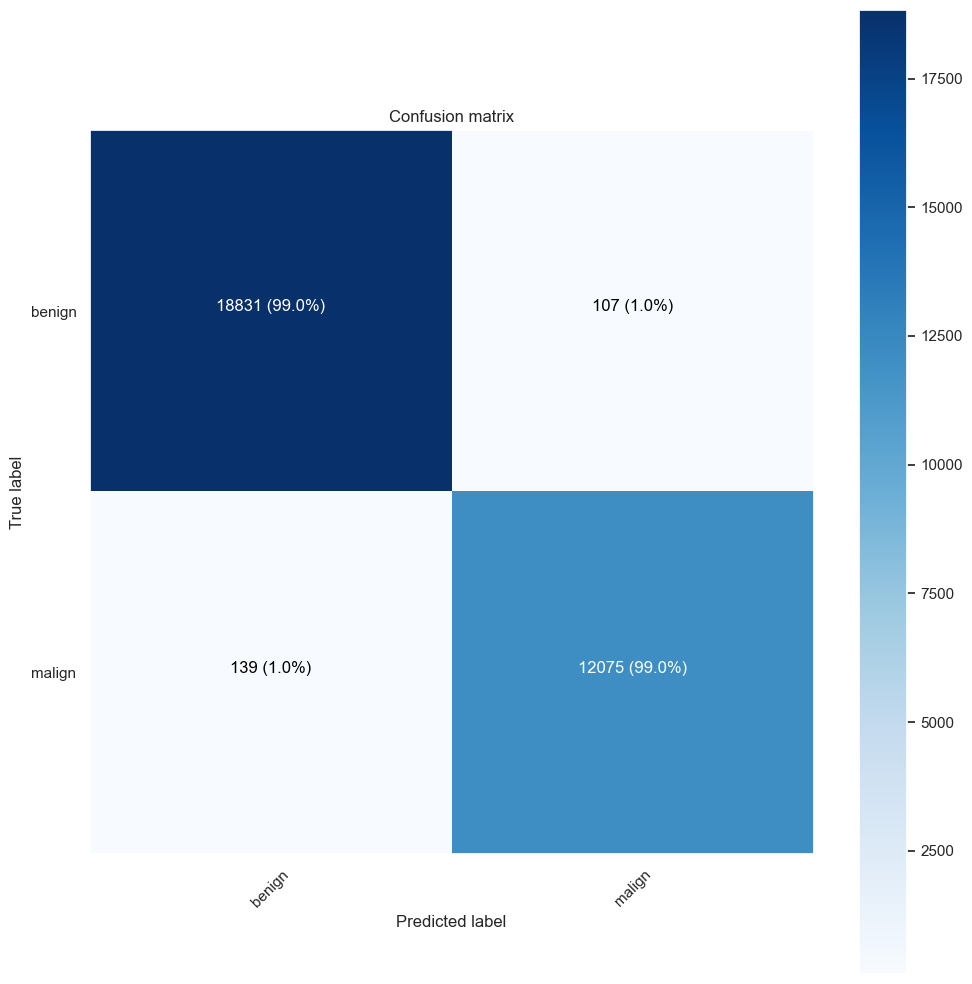

In [47]:
#plotting confusion matrix
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)